In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('HeartDisease.csv')
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [5]:
df.columns = df.columns.str.replace('"', '')

In [6]:
mixed_cols = ['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target']

df[mixed_cols] = df[mixed_cols].applymap(lambda x: x.strip('"') if isinstance(x, str) else x)

In [7]:
df[mixed_cols]

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
numeric_cols = ['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target']

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [9]:
df[numeric_cols]

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
df.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [11]:
#show me value count of target
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

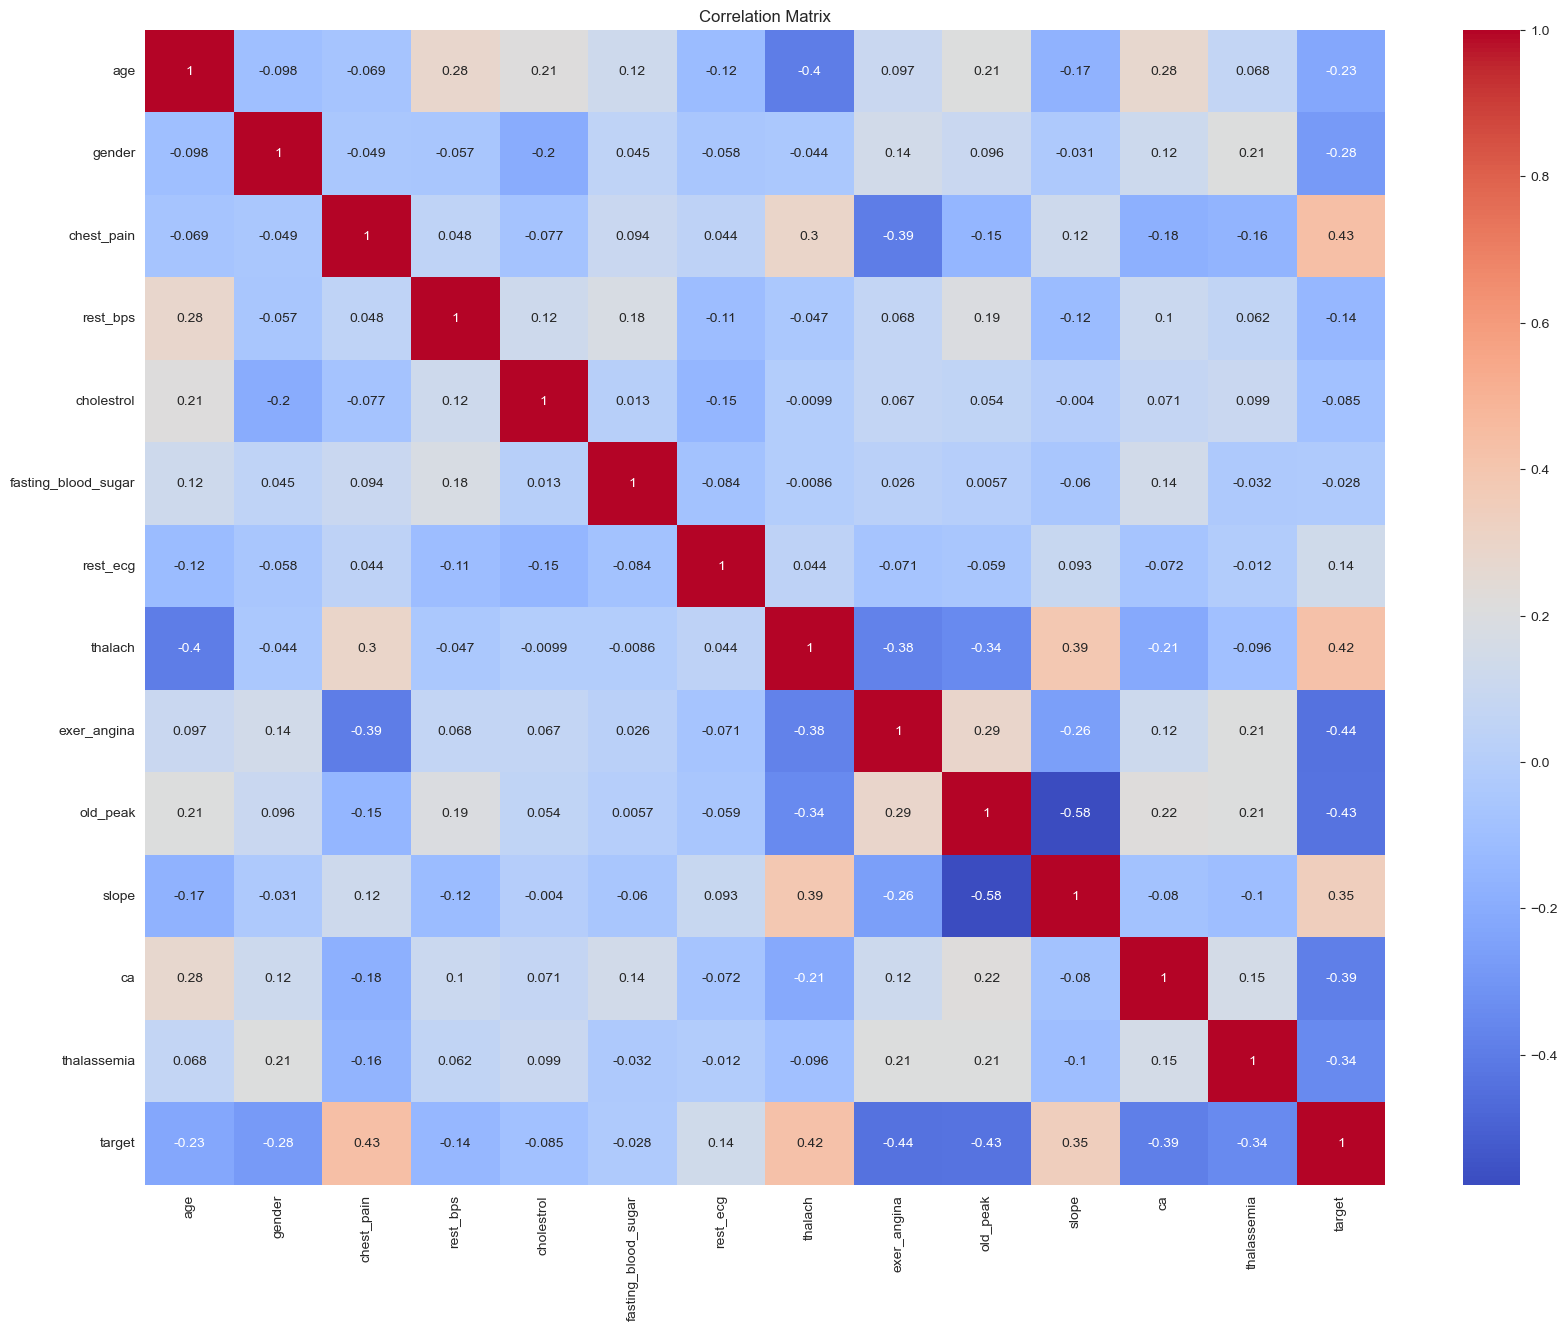

In [12]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

From this correlation matrix we can see that, chest pain and tralach(which is just chest pain while exercising) slope have high correlation with target. So we can use these features to predict target.

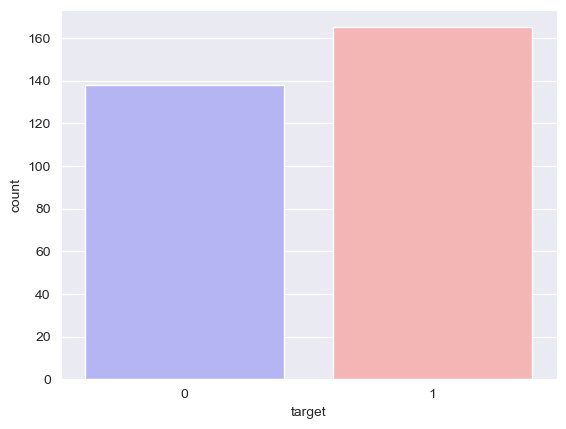

In [16]:
#show me the distribution of target
sns.countplot(x='target', data=df, palette='bwr')
plt.show()


Almost equal values

C:\Users\hrsha\AppData\Local\Temp\ipykernel_6236\3714212602.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], color='red')


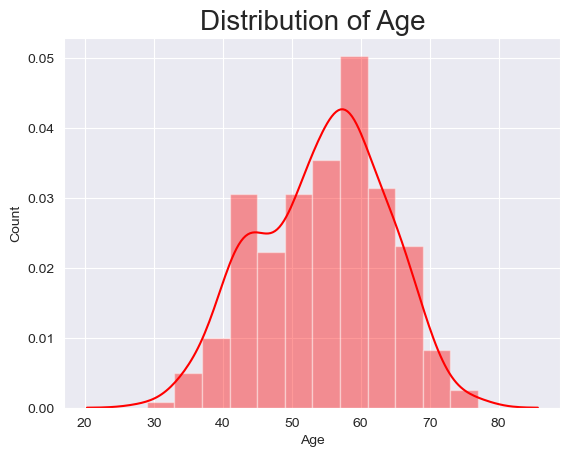

In [18]:
#plot me age with the line that shows which distribution it is
sns.distplot(df['age'], color='red')
plt.title('Distribution of Age', fontsize=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


Age has a fairly normal distribution

In [83]:
minAge=min(df.age)
maxAge=max(df.age)
meanAge=df.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


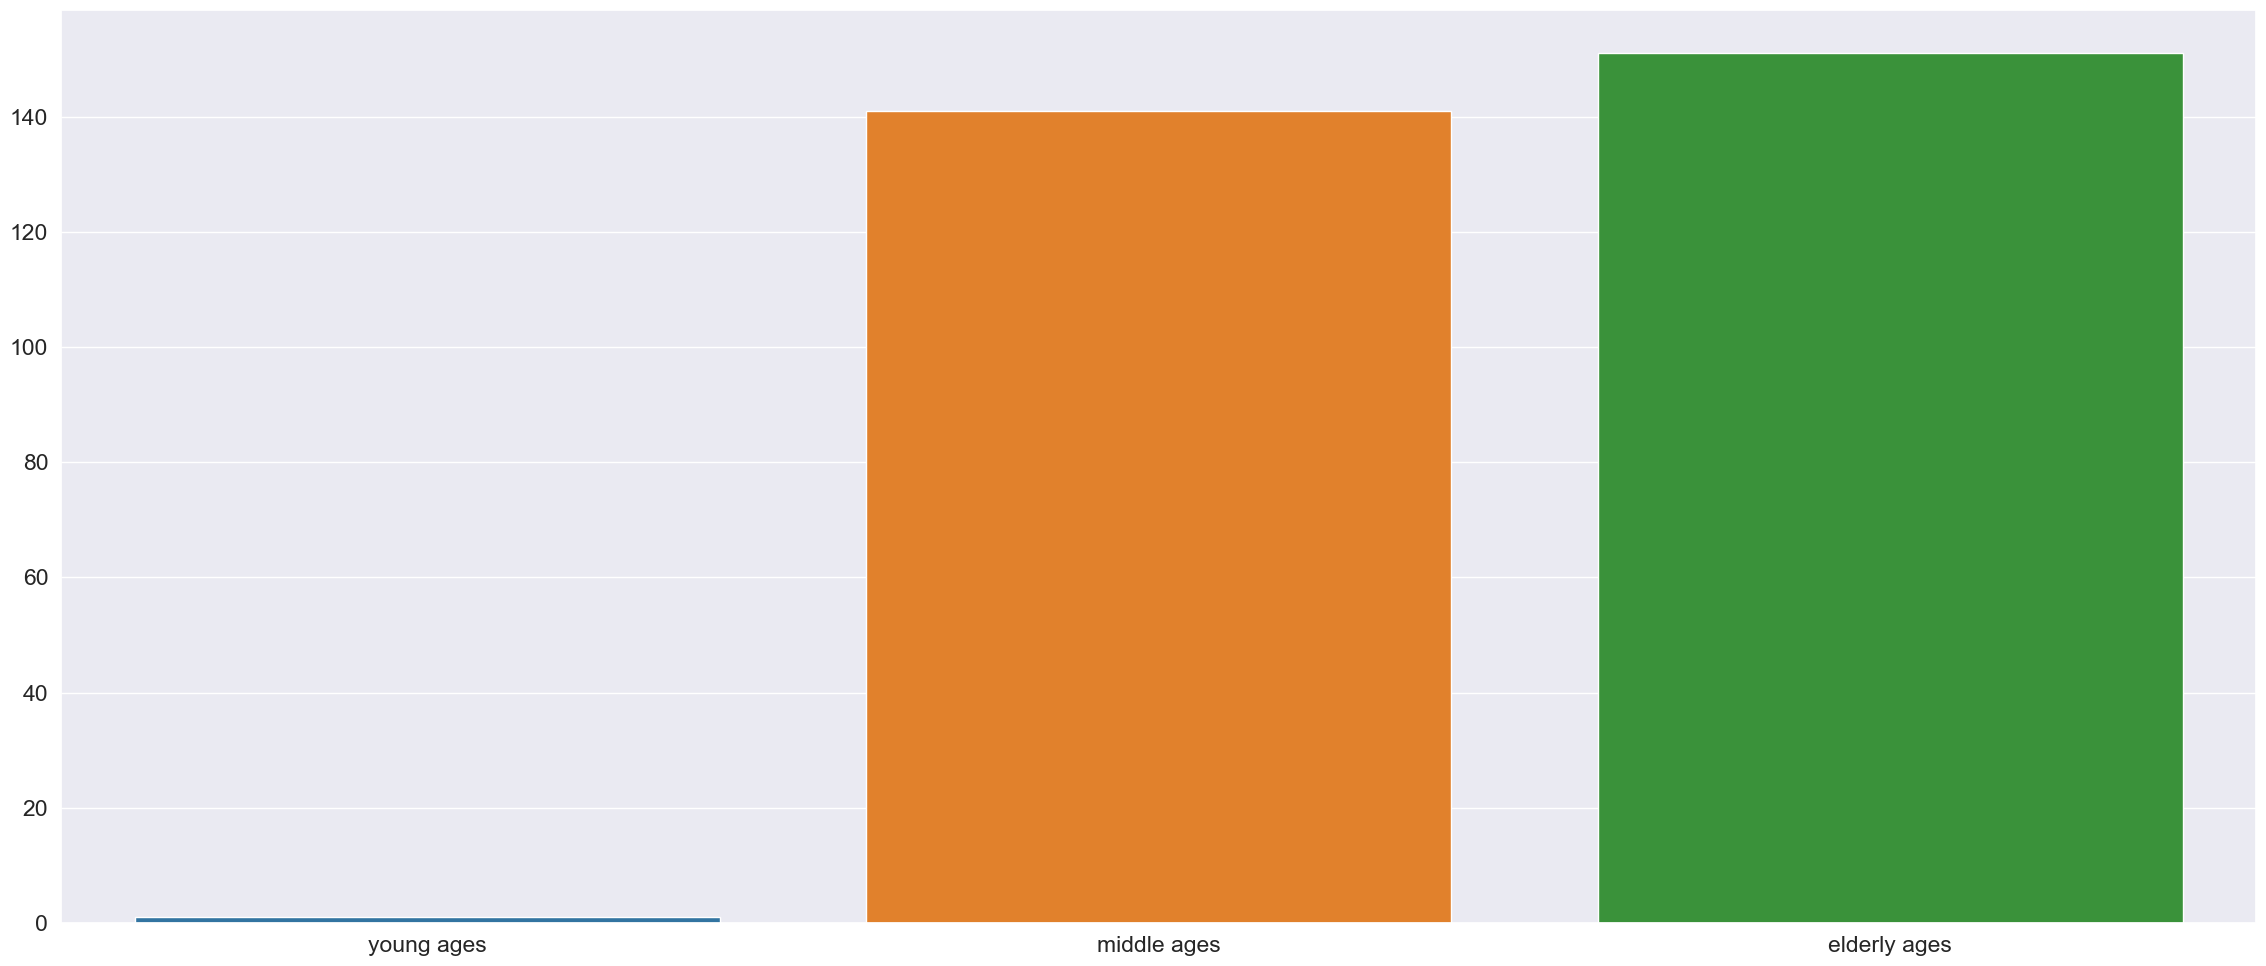

In [84]:
YoungAge = [(df.age>=29)&(df.age<35)]
MiddleAge = df[(df.age>=35)&(df.age<55)]
ElderAge = df[(df.age>55)]

plt.figure(figsize=(23,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(YoungAge),len(MiddleAge),len(ElderAge)])
plt.tight_layout()

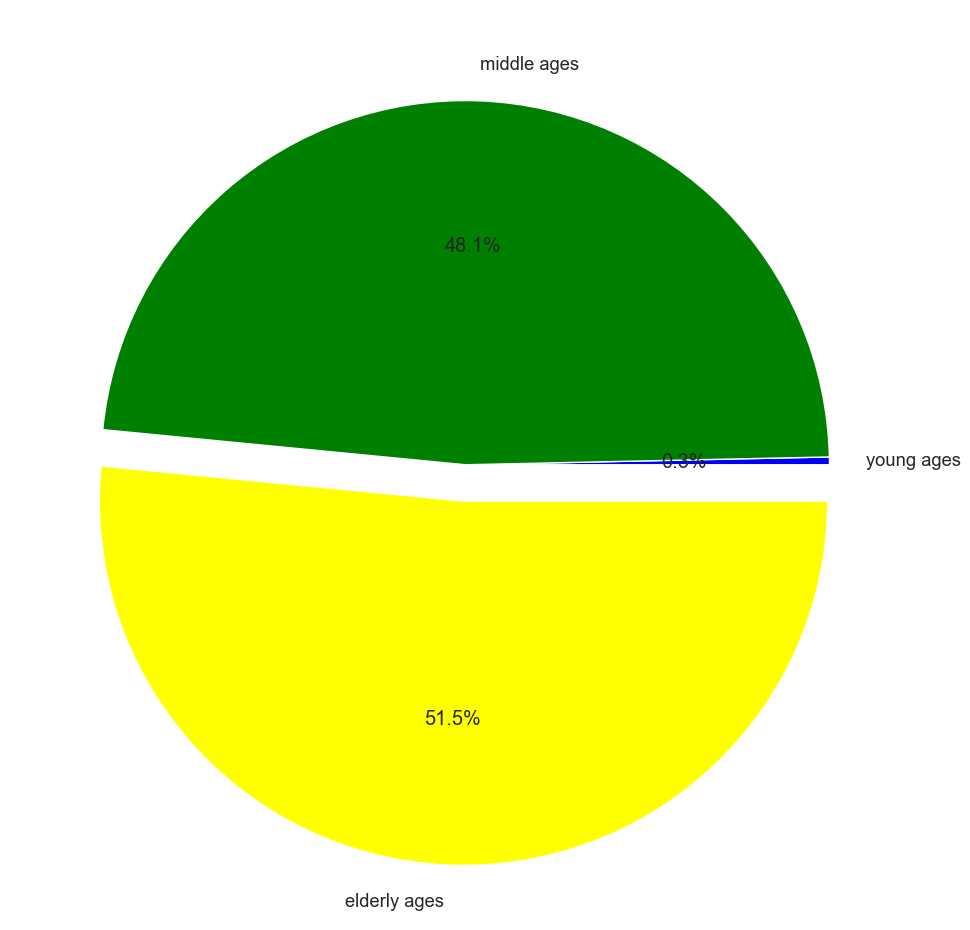

In [85]:
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(YoungAge),len(MiddleAge),len(ElderAge)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

C:\Users\hrsha\AppData\Local\Temp\ipykernel_6236\3089746891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['target'] == 0]['age'], color='red', label='No Heart Disease')
C:\Users\hrsha\AppData\Local\Temp\ipykernel_6236\3089746891.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[

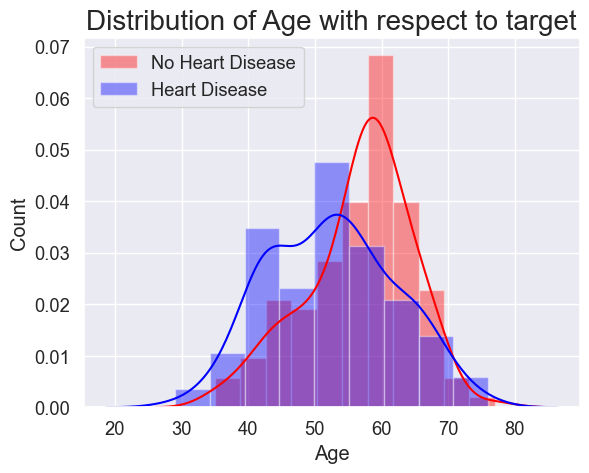

In [86]:
#plot me the distribution of age with respect to target
sns.distplot(df[df['target'] == 0]['age'], color='red', label='No Heart Disease')
sns.distplot(df[df['target'] == 1]['age'], color='blue', label='Heart Disease')
plt.title('Distribution of Age with respect to target', fontsize=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

We may drop young age since its a outlier

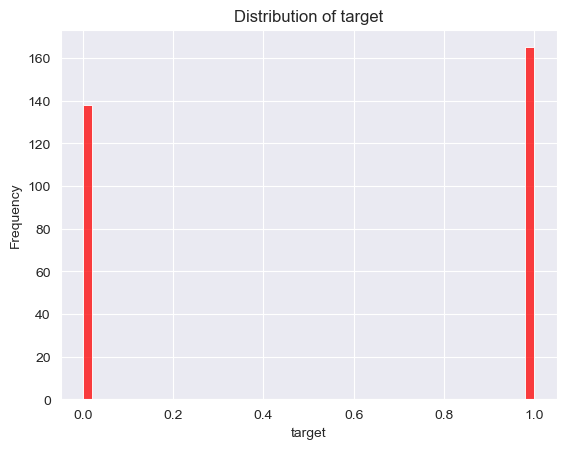

In [19]:
sns.histplot(df['target'], bins=50, color='Red')
plt.xlabel('target')
plt.ylabel('Frequency')
plt.title('Distribution of target')
plt.show()

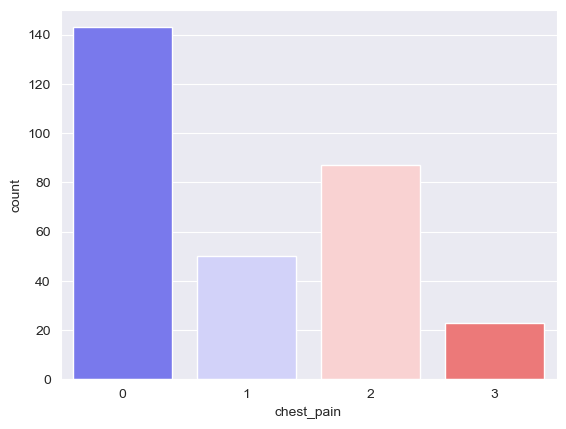

In [21]:
#plot me the distribution of chest pain
sns.countplot(x='chest_pain', data=df, palette='bwr')
plt.show()


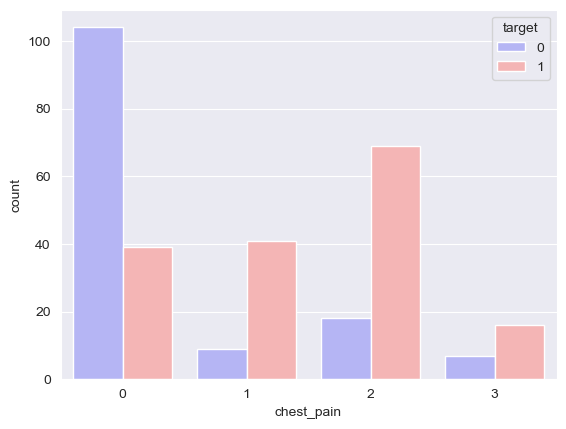

In [22]:
#plot me the distribution of chest pain with respect to target
sns.countplot(x='chest_pain', data=df, palette='bwr', hue='target')
plt.show()


Here we can infer that when there is no chest pain, there is a lower chance of heart disease. And when there is chest pain, there is a higher chance of heart disease.

C:\Users\hrsha\AppData\Local\Temp\ipykernel_6236\2558306289.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['thalach'], color='red')


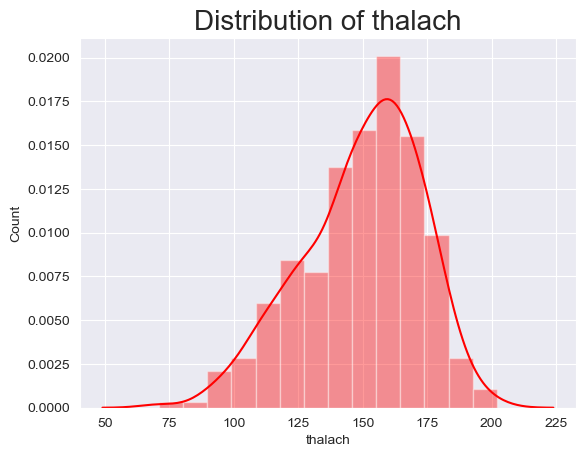

In [23]:
#give me the distribution for thalach
sns.distplot(df['thalach'], color='red')
plt.title('Distribution of thalach', fontsize=20)
plt.xlabel('thalach')
plt.ylabel('Count')
plt.show()

C:\Users\hrsha\AppData\Local\Temp\ipykernel_6236\1520221284.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['target'] == 0]['thalach'], color='red', label='No Heart Disease')
C:\Users\hrsha\AppData\Local\Temp\ipykernel_6236\1520221284.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

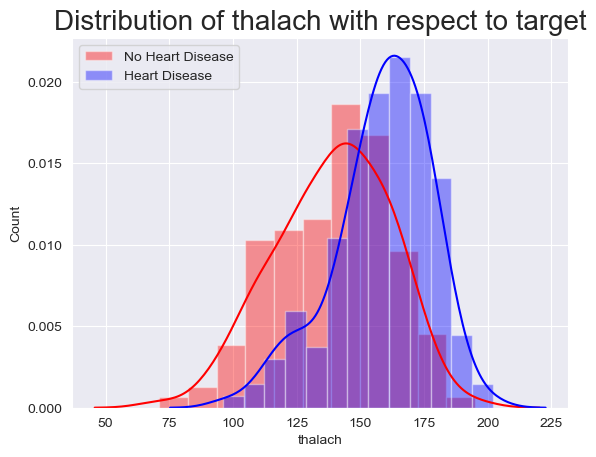

In [24]:
#plot me the distribution of thalach with respect to target
sns.distplot(df[df['target'] == 0]['thalach'], color='red', label='No Heart Disease')
sns.distplot(df[df['target'] == 1]['thalach'], color='blue', label='Heart Disease')
plt.title('Distribution of thalach with respect to target', fontsize=20)
plt.xlabel('thalach')
plt.ylabel('Count')
plt.legend()
plt.show()

higher amount thalach is definetely related to higher chance of heart diease

C:\Users\hrsha\AppData\Local\Temp\ipykernel_6236\1744833345.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['old_peak'], color='red')


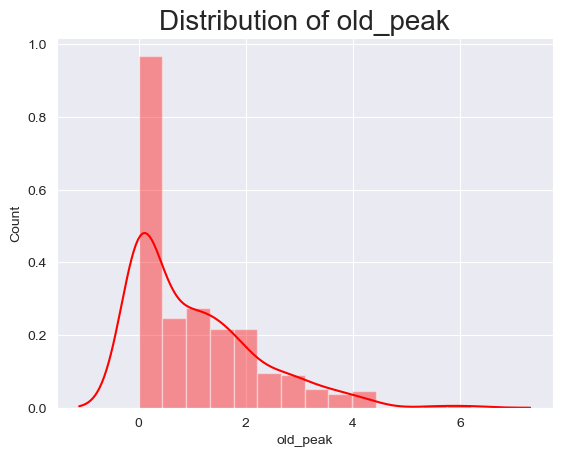

In [25]:
#plot me the distribution of old_peak
sns.distplot(df['old_peak'], color='red')
plt.title('Distribution of old_peak', fontsize=20)
plt.xlabel('old_peak')
plt.ylabel('Count')
plt.show()


C:\Users\hrsha\AppData\Local\Temp\ipykernel_6236\3486266451.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['target'] == 0]['old_peak'], color='red', label='No Heart Disease')
C:\Users\hrsha\AppData\Local\Temp\ipykernel_6236\3486266451.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

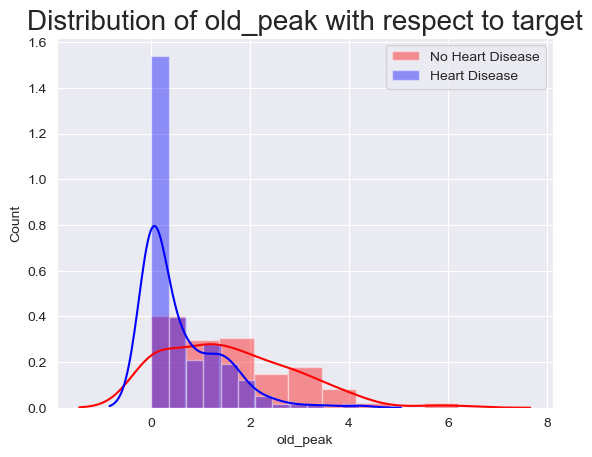

In [26]:
#plot me the distribution of old_peak with respect to target
sns.distplot(df[df['target'] == 0]['old_peak'], color='red', label='No Heart Disease')
sns.distplot(df[df['target'] == 1]['old_peak'], color='blue', label='Heart Disease')
plt.title('Distribution of old_peak with respect to target', fontsize=20)
plt.xlabel('old_peak')
plt.ylabel('Count')
plt.legend()
plt.show()


Old peak also seems somewhat related to heart disease

## Feature Importance

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
X = df.drop('target', axis=1)
y = df['target']

In [15]:
rf = RandomForestClassifier()

In [16]:
rf.fit(X, y)

RandomForestClassifier()

In [17]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

<Axes: >

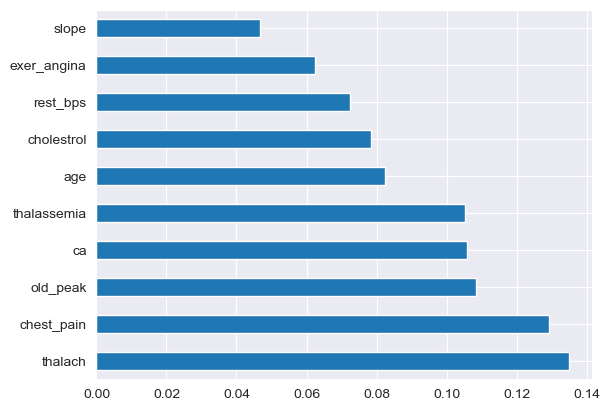

In [18]:
feature_importances.nlargest(10).plot(kind='barh')

In [19]:
feature_importances

age                    0.082544
gender                 0.039835
chest_pain             0.129381
rest_bps               0.072545
cholestrol             0.078331
fasting_blood_sugar    0.010341
rest_ecg               0.023286
thalach                0.134942
exer_angina            0.062283
old_peak               0.108358
slope                  0.046850
ca                     0.105970
thalassemia            0.105334
dtype: float64

In [20]:
sorted_feature_importances = feature_importances.sort_values(ascending=False)

In [21]:
sorted_feature_importances

thalach                0.134942
chest_pain             0.129381
old_peak               0.108358
ca                     0.105970
thalassemia            0.105334
age                    0.082544
cholestrol             0.078331
rest_bps               0.072545
exer_angina            0.062283
slope                  0.046850
gender                 0.039835
rest_ecg               0.023286
fasting_blood_sugar    0.010341
dtype: float64

<Axes: >

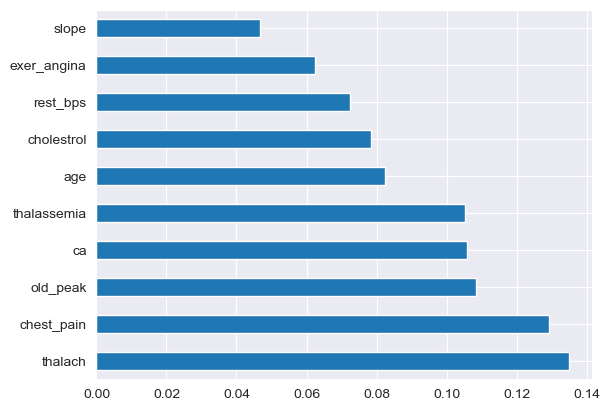

In [22]:
sorted_feature_importances.nlargest(10).plot(kind='barh')

<Axes: >

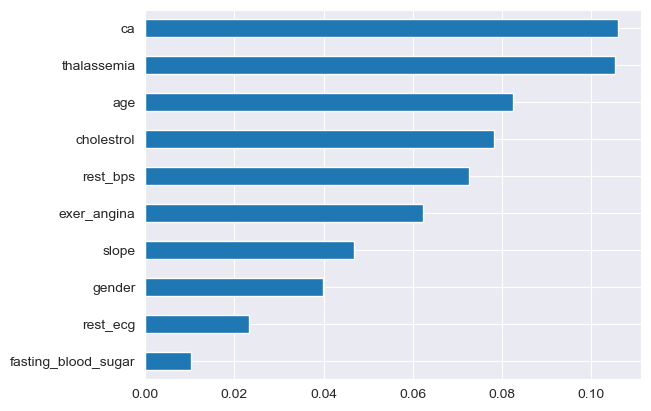

In [23]:
sorted_feature_importances.nsmallest(10).plot(kind='barh')

In [24]:
sorted_feature_importances.nsmallest(10)

fasting_blood_sugar    0.010341
rest_ecg               0.023286
gender                 0.039835
slope                  0.046850
exer_angina            0.062283
rest_bps               0.072545
cholestrol             0.078331
age                    0.082544
thalassemia            0.105334
ca                     0.105970
dtype: float64

## Early modelling with decision tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [26]:
#use decision tree
dt = DecisionTreeClassifier()


In [27]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
#fit the model
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
#predict the model
y_pred = dt.predict(X_test)


In [30]:
#check the accuracy, classifcation report and confusion matrix
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Classification Report: ', classification_report(y_test, y_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))

Accuracy Score:  0.8032786885245902
Classification Report:                precision    recall  f1-score   support

           0       0.73      0.93      0.82        29
           1       0.92      0.69      0.79        32

    accuracy                           0.80        61
   macro avg       0.82      0.81      0.80        61
weighted avg       0.83      0.80      0.80        61

Confusion Matrix:  [[27  2]
 [10 22]]


In [31]:
#use random forest
rf = RandomForestClassifier()

In [32]:
#fit the model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
#predict the model
y_pred = rf.predict(X_test)

In [34]:
#check the accuracy, classifcation report and confusion matrix
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Classification Report: ', classification_report(y_test, y_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))

Accuracy Score:  0.8524590163934426
Classification Report:                precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix:  [[24  5]
 [ 4 28]]


## Now lets try and do feature selection and tuning

In [35]:
from sklearn.feature_selection import SelectKBest, chi2

In [36]:
#use select k best
skb = SelectKBest(score_func=chi2, k=10)


In [37]:
#fit the model
skb.fit(X_train, y_train)


SelectKBest(score_func=<function chi2 at 0x000001EEBDA6B600>)

In [38]:
#cotinue
X_train.columns[skb.get_support()]

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol', 'thalach',
       'exer_angina', 'old_peak', 'slope', 'ca'],
      dtype='object')

In [39]:
#continue
X_train_new = skb.transform(X_train)
X_test_new = skb.transform(X_test)

In [40]:
#continue
dt.fit(X_train_new, y_train)

DecisionTreeClassifier()

In [41]:
#continue
y_pred = dt.predict(X_test_new)

In [42]:
#continue
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Classification Report: ', classification_report(y_test, y_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))

Accuracy Score:  0.8032786885245902
Classification Report:                precision    recall  f1-score   support

           0       0.74      0.90      0.81        29
           1       0.88      0.72      0.79        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61

Confusion Matrix:  [[26  3]
 [ 9 23]]


In [43]:
#continue
rf.fit(X_train_new, y_train)

RandomForestClassifier()

In [44]:
#continue
y_pred = rf.predict(X_test_new)

In [45]:
#continue
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Classification Report: ', classification_report(y_test, y_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))


Accuracy Score:  0.8688524590163934
Classification Report:                precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion Matrix:  [[25  4]
 [ 4 28]]


In [46]:
#continue
from sklearn.model_selection import GridSearchCV

In [47]:
#continue
params = {'n_estimators': [100, 200, 300, 400, 500],
          'criterion': ['gini', 'entropy'],
          'max_depth': [3, 4, 5, 6, 7, 8],
          'min_samples_split': [2, 3, 4, 5, 6],
          'min_samples_leaf': [1, 2, 3, 4, 5],
          'max_features': ['auto', 'sqrt', 'log2']}


In [48]:
#continue
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv=5, n_jobs=-1, verbose=1)

In [49]:
#continue
grid_search.fit(X_train_new, y_train)

Fitting 5 folds for each of 4500 candidates, totalling 22500 fits



KeyboardInterrupt



In [50]:
#continue
best_params = grid_search.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [51]:
rf = RandomForestClassifier(
    criterion=best_params['criterion'],
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    n_estimators=best_params['n_estimators']
)

NameError: name 'best_params' is not defined

In [77]:
#continue
rf.fit(X_train_new, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=4)

In [78]:
#continue
y_pred = rf.predict(X_test_new)

In [79]:
#continue
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Classification Report: ', classification_report(y_test, y_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))

Accuracy Score:  0.8688524590163934
Classification Report:                precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion Matrix:  [[25  4]
 [ 4 28]]


In [80]:
#continue
from sklearn.model_selection import cross_val_score

In [81]:
#continue
cross_val_score(rf, X_train_new, y_train, cv=5, scoring='accuracy').mean()

0.8137755102040817

In [52]:
#use smote
from imblearn.over_sampling import SMOTE

In [53]:
#continue
smote = SMOTE()

In [54]:
#continue
X_train_smote, y_train_smote = smote.fit_resample(X_train_new, y_train)

In [55]:
#continue
rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

In [56]:
#continue
y_pred = rf.predict(X_test_new)

In [57]:
#continue
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Classification Report: ', classification_report(y_test, y_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))

Accuracy Score:  0.8524590163934426
Classification Report:                precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix:  [[25  4]
 [ 5 27]]


In [58]:
#continue
cross_val_score(rf, X_train_smote, y_train_smote, cv=5, scoring='accuracy').mean()

NameError: name 'cross_val_score' is not defined

Since dataset is relatively small smote did little to no effect

In [59]:
#use wrapper method for feature
from sklearn.feature_selection import RFE

In [60]:
#continue
rfe = RFE(estimator=rf, n_features_to_select=10)

In [61]:
#continue
rfe.fit(X_train_new, y_train)

RFE(estimator=RandomForestClassifier(), n_features_to_select=10)

In [62]:
# Assuming you've already performed feature selection with RFE (Recursive Feature Elimination)
# and have a mask of selected features in 'rfe.get_support()'
import numpy as np
# Get the selected feature indices
selected_feature_indices = np.where(rfe.get_support())[0]

# Use these indices to extract the selected features from the original feature matrix
X_train_new = X_train_new[:, selected_feature_indices]


In [63]:
#continue
rf.fit(X_train_new, y_train)

RandomForestClassifier()

In [64]:
#continue
y_pred = rf.predict(X_test_new)

In [65]:
#continue
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Classification Report: ', classification_report(y_test, y_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))

Accuracy Score:  0.8688524590163934
Classification Report:                precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion Matrix:  [[25  4]
 [ 4 28]]


In [66]:
#drop columsn that have low feature importance
X_train_new = X_train_new[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
X_test_new = X_test_new[:, [0, 1, 2, 3#, 4, 5, 6, 7, 8, 9]]

SyntaxError: incomplete input (2573487371.py, line 3)

In [67]:
#continue
rf.fit(X_train_new, y_train)

RandomForestClassifier()

In [68]:
#continue
y_pred = rf.predict(X_test_new)

In [69]:
#continue
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Classification Report: ', classification_report(y_test, y_pred))

Accuracy Score:  0.8688524590163934
Classification Report:                precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61


In [70]:
#print auc
from sklearn.metrics import roc_auc_score

In [71]:
#continue
print('AUC Score: ', roc_auc_score(y_test, y_pred))

AUC Score:  0.8685344827586206


In [72]:
from sklearn.svm import SVC
estimator = SVC()

parameters = [{'kernel':['rbf'],
               'C':[1,10,100,1000],
               'gamma':[1,0.1,0.001,0.0001],
            }]

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'accuracy',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

AttributeError: 'DataFrame' object has no attribute 'value_count'

In [75]:
grid_search.fit(X_train_new, y_train)
grid_search.best_estimator_

Fitting 10 folds for each of 16 candidates, totalling 160 fits


SVC(C=100, gamma=0.0001)

In [76]:
y_pred = grid_search.best_estimator_.predict(X_test)

C:\Users\hrsha\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


ValueError: X has 13 features, but SVC is expecting 10 features as input.

In [77]:
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Classification Report: ', classification_report(y_test, y_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
print('AUC Score: ', roc_auc_score(y_test, y_pred))

Accuracy Score:  0.8688524590163934
Classification Report:                precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion Matrix:  [[25  4]
 [ 4 28]]
AUC Score:  0.8685344827586206
